# Displaying beam based aligmennt measurement re

In [1]:
import pathlib

from IPython.display import display, Markdown, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from pathlib import Path, PosixPath

In [2]:
import xarray as xr
import numpy as np
import os.path
import matplotlib.pyplot as plt

from dataclasses import dataclass
# %matplotlib notebook
%matplotlib inline

In [3]:
data_dir = Path(os.getcwd()) / ".." / "bact_analysis_bessyii"/ "scripts"
data_dir = Path(os.path.normpath(data_dir))
data_dir

PosixPath('/home/waheed/workspace/bact/custom/bessyii/analysis/bact_analysis_bessyii/scripts')

In [4]:
os.listdir(data_dir)

['estimated_angles_6c07a21f-8294-488a-8088-0901c587ee71.nc',
 'offsets_a950d939-377a-4099-ab22-d2db63c8bfb9.nc',
 'estimated_angles_a950d939-377a-4099-ab22-d2db63c8bfb9.nc',
 'estimated_angles_de2c658c-6327-4c85-99d6-141a2a36a562.nc',
 'preprocessed_measurement_data_a950d939-377a-4099-ab22-d2db63c8bfb9.nc',
 'offsets_edafb178-5e73-4236-b155-a8ea5fa1d765.nc',
 'preprocessed_measurement_data_dcc0724e-746f-4ddf-ba66-fb38a2b5c311.nc',
 'preprocessed_measurement_data_edafb178-5e73-4236-b155-a8ea5fa1d765.nc',
 'preprocessed_measurement_data_57b33fa9-fe3c-4731-9bc6-c37d11cc8b04.nc',
 'estimated_angles_bcfaa7e9-3a99-4a30-8a77-bbb941e3b915.nc',
 'offsets_6c07a21f-8294-488a-8088-0901c587ee71.nc',
 'bba.py',
 'estimated_angles_57b33fa9-fe3c-4731-9bc6-c37d11cc8b04.nc',
 'estimated_angles_dcc0724e-746f-4ddf-ba66-fb38a2b5c311.nc',
 'offsets_bcfaa7e9-3a99-4a30-8a77-bbb941e3b915.nc',
 'preprocessed_measurement_data_6c07a21f-8294-488a-8088-0901c587ee71.nc',
 'estimated_angles_7c58f6dd-92ce-407c-8b99-00

In [17]:
# campain 1788
uids = [
    # variable names without dt ....
    # 'bceb0543-46f4-4bf8-9757-2340cacefb3b',
    # 'b61e48bb-6f7b-4559-9053-f6049fc51bac'
]
uids += ['129393ae-500a-48b0-b93a-ad507b12e57d'
]
#campain 1945

In [18]:
uid = uids[-1]
estimated_angles = xr.load_dataset(os.path.join(data_dir, f'estimated_angles_{uid}.nc'))
offsets = xr.load_dataarray(os.path.join(data_dir, f'offsets_{uid}.nc'))

In [19]:
chck_path = '/home/waheed/workspace/bact/custom/bessyii/analysis/bact_analysis_bessyii/scripts'
os.listdir(chck_path)

['estimated_angles_6c07a21f-8294-488a-8088-0901c587ee71.nc',
 'offsets_a950d939-377a-4099-ab22-d2db63c8bfb9.nc',
 'estimated_angles_a950d939-377a-4099-ab22-d2db63c8bfb9.nc',
 'estimated_angles_de2c658c-6327-4c85-99d6-141a2a36a562.nc',
 'preprocessed_measurement_data_a950d939-377a-4099-ab22-d2db63c8bfb9.nc',
 'offsets_edafb178-5e73-4236-b155-a8ea5fa1d765.nc',
 'preprocessed_measurement_data_dcc0724e-746f-4ddf-ba66-fb38a2b5c311.nc',
 'preprocessed_measurement_data_edafb178-5e73-4236-b155-a8ea5fa1d765.nc',
 'preprocessed_measurement_data_57b33fa9-fe3c-4731-9bc6-c37d11cc8b04.nc',
 'estimated_angles_bcfaa7e9-3a99-4a30-8a77-bbb941e3b915.nc',
 'offsets_6c07a21f-8294-488a-8088-0901c587ee71.nc',
 'bba.py',
 'estimated_angles_57b33fa9-fe3c-4731-9bc6-c37d11cc8b04.nc',
 'estimated_angles_dcc0724e-746f-4ddf-ba66-fb38a2b5c311.nc',
 'offsets_bcfaa7e9-3a99-4a30-8a77-bbb941e3b915.nc',
 'preprocessed_measurement_data_6c07a21f-8294-488a-8088-0901c587ee71.nc',
 'estimated_angles_7c58f6dd-92ce-407c-8b99-00

In [20]:
estimated_angles.orbit

<xarray.DataArray 'orbit' (name: 2, plane: 2, pos: 1364)>
array([[[ 1.62293956e-04,  1.59673491e-04,  1.59673491e-04, ...,
          1.64482289e-04,  1.62293956e-04,  1.62293956e-04],
        [ 1.06720862e-05,  1.69589196e-05,  1.69589196e-05, ...,
          5.42199301e-06,  1.06720862e-05,  1.06720862e-05]],

       [[-8.41152316e-05, -8.44191922e-05, -8.44191922e-05, ...,
         -8.38613961e-05, -8.41152316e-05, -8.41152316e-05],
        [ 2.41244004e-05,  3.29510401e-05,  3.29510401e-05, ...,
          1.67533317e-05,  2.41244004e-05,  2.41244004e-05]]])
Coordinates:
  * name     (name) object 'q1m2t8r' 'q3m2t8r'
  * plane    (plane) object 'x' 'y'
  * pos      (pos) object 'start' 'dg9l2d1r' ... 'dg9l1d1r' 'ringend'
Attributes:
    theta:                1e-05
    scale_tune:           1
    scale_phase_advance:  6.283185307179586

In [21]:

estimated_angles

<xarray.Dataset>
Dimensions:     (name: 2, plane: 2, pos: 1364, result: 2, parameter: 110)
Coordinates:
  * name        (name) object 'q1m2t8r' 'q3m2t8r'
  * plane       (plane) object 'x' 'y'
  * pos         (pos) object 'start' 'dg9l2d1r' ... 'dg9l1d1r' 'ringend'
  * result      (result) object 'value' 'error'
  * parameter   (parameter) object 'scaled_angle' 'bpmz6d1r' ... 'bpmz4d1r'
Data variables:
    orbit       (name, plane, pos) float64 0.0001623 0.0001597 ... 2.412e-05
    fit_params  (name, plane, result, parameter) float64 1.125e-06 ... 2.374e-06
    ds          (pos) float64 0.0 0.6155 0.6155 1.137 ... 239.5 240.0 240.0
    ds_elems    (name) float64 229.2 232.1
Attributes:
    bpm_names:  ['bpmz6d1r', 'bpmz7d1r', 'bpmz1t1r', 'bpmz2t1r', 'bpmz3t1r', ...

In [22]:
estimated_angles.orbit.attrs['theta']

1e-05

In [23]:
estimated_angles.fit_params.sel(name="q3m2t8r", plane="x", result="value", parameter="scaled_angle")

<xarray.DataArray 'fit_params' ()>
array(6.5588701e-06)
Coordinates:
    name       <U7 'q3m2t8r'
    plane      <U1 'x'
    result     <U5 'value'
    parameter  <U12 'scaled_angle'

In [24]:
pscale = 1000

Text(0.5, 0, 'ds [m]')

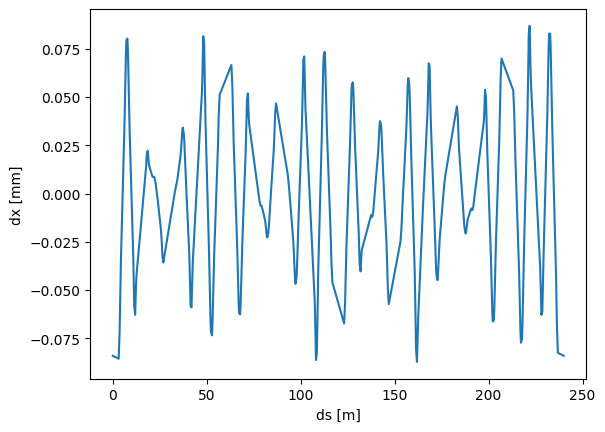

In [25]:
fig, ax = plt.subplots(1, 1)
ax.plot(
    estimated_angles.ds, estimated_angles.orbit.sel(name="q3m2t8r", plane="x") * pscale
)
ax.set_ylabel("dx [mm]")
ax.set_xlabel("ds [m]")

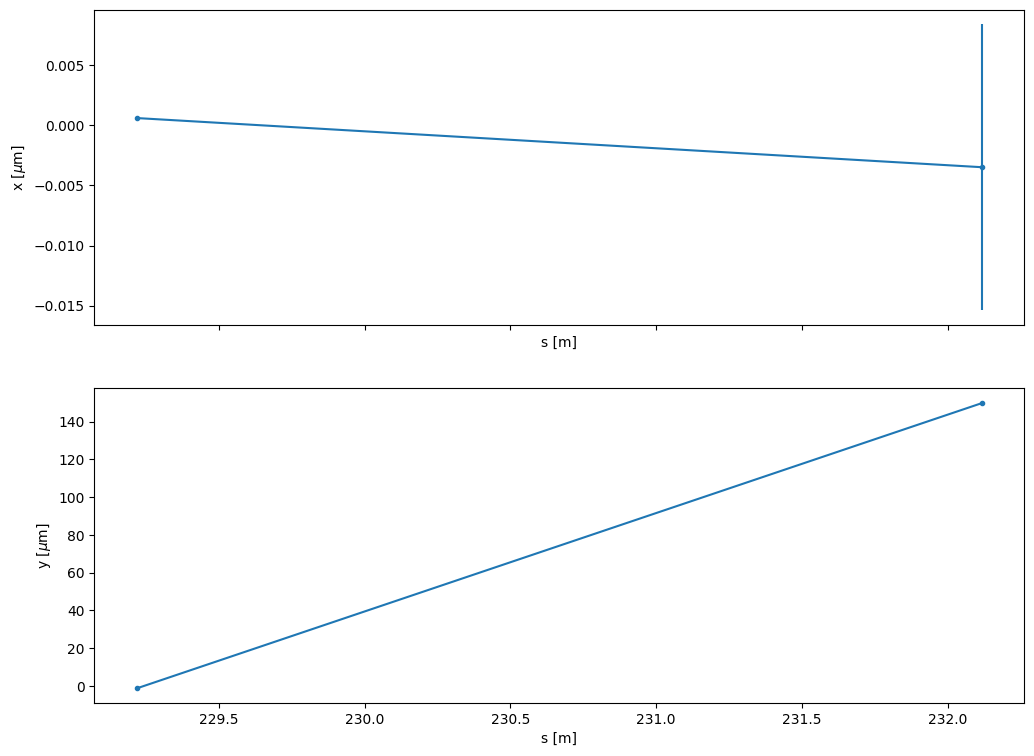

In [26]:
fig, axes = plt.subplots(2, 1, figsize=[12, 9], sharex=True)
ax_x, ax_y = axes
a_scale = 1e6

for uid in uids:
    estimated_angles = xr.load_dataset(os.path.join(data_dir, f'estimated_angles_{uid}.nc'))
    offsets = xr.load_dataarray(os.path.join(data_dir, f'offsets_{uid}.nc'))
    
    ds = estimated_angles.ds_elems
    quad_names = estimated_angles.coords['name'].values
    
    ax_x.errorbar(
        ds,
        offsets.sel(name=quad_names, result="value", plane="x") * a_scale,
        yerr=offsets.sel(name=quad_names, result="error", plane="x") * a_scale,
        fmt=".-",
    )
    ax_y.errorbar(
        ds,
        offsets.sel(name=quad_names, result="value", plane="y") * a_scale,
        yerr=offsets.sel(name=quad_names, result="error", plane="y") * a_scale,
        fmt=".-",
    )
    ax_y.set_xlabel("s [m]")
    ax_x.set_xlabel("s [m]")
    ax_x.set_ylabel("x [$\mu$m]")
    ax_y.set_ylabel("y [$\mu$m]")

In [15]:
@dataclass
class ReferenceOffsets:
    x: object
    xerr: object
    y: object
    yerr: object
    ds: object

Set refence plots start after next plot


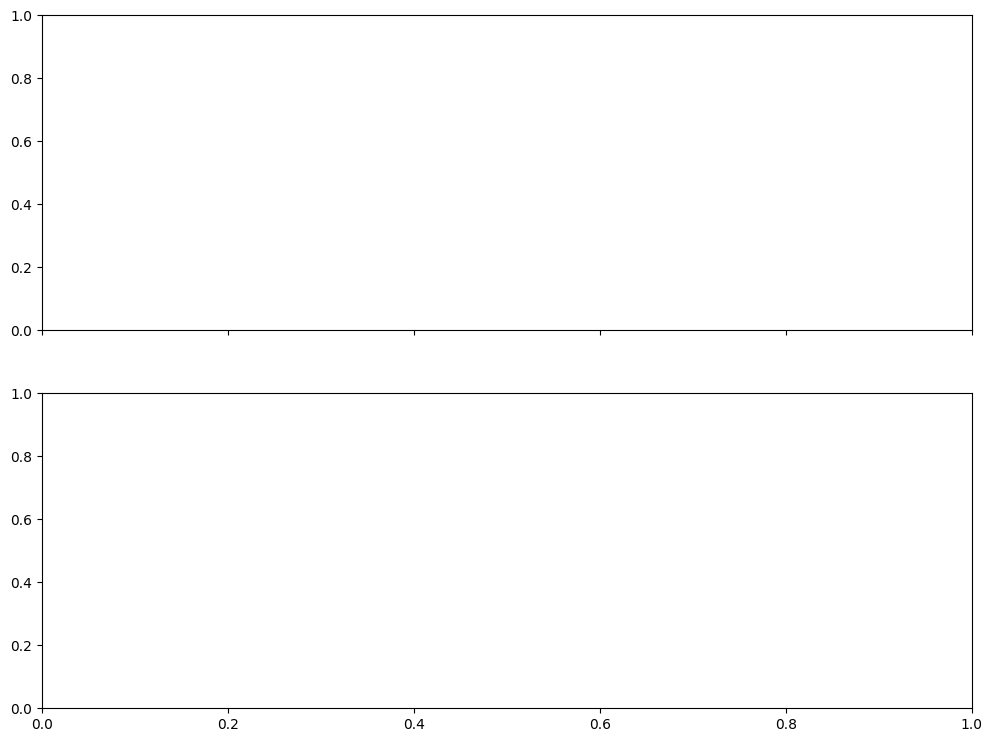

In [16]:
fig, axes = plt.subplots(2, 1, figsize=[12, 9], sharex=True)
ax_x, ax_y = axes
a_scale = 1e6

ref = None
for uid in uids:
    estimated_angles = xr.load_dataset(os.path.join(data_dir, f'estimated_angles_{uid}.nc'))
    offsets = xr.load_dataarray(os.path.join(data_dir, f'offsets_{uid}.nc'))
    
    
    ds = estimated_angles.ds_elems
    quad_names = estimated_angles.coords['name'].values
    x = offsets.sel(name=quad_names, result="value", plane="x") * a_scale
    y = offsets.sel(name=quad_names, result="value", plane="y") * a_scale
    xerr = offsets.sel(name=quad_names, result="error", plane="x") * a_scale
    yerr = offsets.sel(name=quad_names, result="error", plane="x") * a_scale
    if not ref:
        xerr= np.absolute(xerr)
        yerr= np.absolute(yerr)
        ref = ReferenceOffsets(x=x, y=y, xerr=xerr, yerr=yerr, ds=ds)
        print("Set refence plots start after next plot")
        continue 
    else:
        xerr = np.absolute(xerr) + ref.xerr
        yerr = np.absolute(xerr) + ref.yerr
        
    ax_x.errorbar(
        ds,
        x - ref.x,
        yerr=xerr,
        fmt=".-"
    )
    ax_y.errorbar(
        ds,
        y - ref.y,
        yerr=yerr,
        fmt=".-",
    )
    ax_y.set_xlabel("s [m]")
    ax_x.set_xlabel("s [m]")
    ax_x.set_ylabel("x [$\mu$m]")
    ax_y.set_ylabel("y [$\mu$m]")